# Final Project. Step 3: Statistical Analysis

**Requirements:**

Do some statistical analysis (inferential statistics) tasks for your dataset, e.g. check correlation, build a linear regression, test some hypothesis, ANOVA, confidence interval. Choose the tasks and columns of the dataset, that make sense.

If you are using Kaggle, mark with text where you use code from an existing project, and where is your own work (do include your work).

Explain by text what you are doing in the code.

## Description of Dataset (Provided by repository)

The phishing problem is considered a vital issue in the e-commerce industry especially e-banking and e-commerce taking the number of online transactions involving payments.
We have identified different features related to legitimate and phishy websites and collected 1353 different websites from difference sources. Phishing websites were collected from Phishtank data archive (www.phishtank.com), which is a free community site where users can submit, verify, track and share phishing data. The legitimate websites were collected from Yahoo and starting point directories using a web script developed in PHP. The PHP script was plugged with a browser and we collected 548 legitimate websites out of 1353 websites. There is 702 phishing URLs, and 103 suspicious URLs.  

When a website is considered SUSPICIOUS that means it can be either phishy or legitimate, meaning the website held some legit and phishy features.

## Variables Table

| Variable Name      | Role    | Type    | Missing Values |
|--------------------|---------|---------|----------------|
| SFH                | Feature | Integer | no             |
| popUpWindow        | Feature | Integer | no             |
| SSLfinal_State     | Feature | Integer | no             |
| Request_URL        | Feature | Integer | no             |
| URL_of_Anchor      | Feature | Integer | no             |
| web_traffic        | Feature | Integer | no             |
| URL_Length         | Feature | Integer | no             |
| age_of_domain      | Feature | Integer | no             |
| having_IP_Address  | Feature | Integer | no             |
| Result             | Target  | Integer | no             |


## Sources of Data
- Phishing Websites: The researchers sourced 752 phishing sites from PhishTank and Millersmiles. These platforms are community-driven archives where users report and share data on known phishing attacks.   

- Legitimate Websites: They collected 601 legitimate sites from the Yahoo Directory.  

Collection Methodology To gather this data efficiently, the authors developed a specific web script written in PHP. This script was embedded directly into a web browser, allowing them to automatically browse, scrape, and extract the necessary feature data from the 1,353 total websites included in the study.

## Importing Dataset and Conversion from .arff

In [29]:
# Website Phishing data from https://archive.ics.uci.edu/dataset/379/website+phishing
path = "/content/drive/MyDrive/CSI 470 - Big Data and Analytics/PhishingData.arff"

print("Dataset file path:", path)

Dataset file path: /content/drive/MyDrive/CSI 470 - Big Data and Analytics/PhishingData.arff


In [30]:
import pandas as pd
from scipy.io import arff

# arff.loadarff necessary for arff file format
data = arff.loadarff(path)

# extracting column names and convert into dataframe
df = pd.DataFrame(data[0])

# decode byte strings to regular strings
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].str.decode('utf-8')

# NOTE: Legitimate, Suspicious, and Phishy values are represented by numerical values 1,0 and -1 respectively
df.head(15)

,SFH,popUpWidnow,SSLfinal_State,Request_URL,URL_of_Anchor,web_traffic,URL_Length,age_of_domain,having_IP_Address,Result
0,1,-1,1,-1,-1,1,1,1,0,0
1,-1,-1,-1,-1,-1,0,1,1,1,1
2,1,-1,0,0,-1,0,-1,1,0,1
3,1,0,1,-1,-1,0,1,1,0,0
4,-1,-1,1,-1,0,0,-1,1,0,1
5,-1,-1,1,-1,-1,1,0,-1,0,1
6,1,-1,0,1,-1,0,0,1,0,-1
7,1,0,1,1,0,0,0,1,1,-1
8,-1,-1,0,-1,-1,-1,-1,1,0,0
9,-1,0,-1,-1,1,1,0,-1,0,1


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1353 entries, 0 to 1352
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   SFH                1353 non-null   object
 1   popUpWidnow        1353 non-null   object
 2   SSLfinal_State     1353 non-null   object
 3   Request_URL        1353 non-null   object
 4   URL_of_Anchor      1353 non-null   object
 5   web_traffic        1353 non-null   object
 6   URL_Length         1353 non-null   object
 7   age_of_domain      1353 non-null   object
 8   having_IP_Address  1353 non-null   object
 9   Result             1353 non-null   object
dtypes: object(10)
memory usage: 105.8+ KB


## Finding the Strongest Predictor (Correlation)
Evaluating which variable is most strongly correlated with the "phishyness" of a website.

Values closer to 1 (Legitimate) or -1 (Phishy) indicate a strong correlation. For example, based on the results below, a Server Form Handler (`SFH`) marked "Phishy" is a stronger predictor that the Result will be -1 than a `URL` marked "Phishy".

In [32]:
# calculate correlation matrix
correlation_matrix = df.corr()

# get correlations with 'Result' column
result_correlation = correlation_matrix['Result'].sort_values(ascending=False)

# display correlations
print("Correlation with result:")
print(result_correlation)

Correlation with result:
Result               1.000000
web_traffic          0.243896
having_IP_Address   -0.059225
URL_Length          -0.183061
age_of_domain       -0.231931
Request_URL         -0.271609
URL_of_Anchor       -0.287007
popUpWidnow         -0.509749
SSLfinal_State      -0.518762
SFH                 -0.678277
Name: Result, dtype: float64


## Linear Regression
Using linear regression to predict the `Result` based on one single feature. Since `SFH` seems to be the strongest predictor, this code uses it.

Slope: -0.7066872288679786
Intercept: 0.054363109900583226
Regression Equation: y = 0.054363109900583226 + -0.7066872288679786x


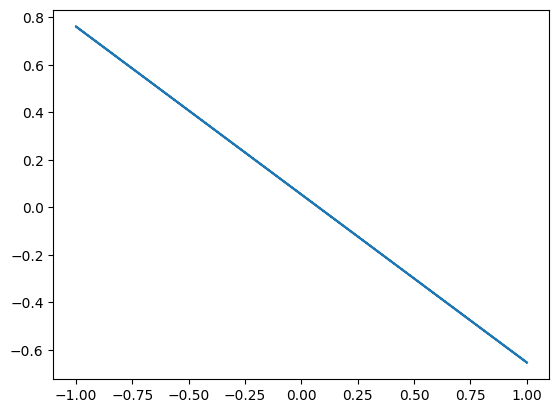

In [33]:
import scipy.stats as stats
import matplotlib.pyplot as plt

for col in df.columns:
    df[col] = pd.to_numeric(df[col])


# define independent (x) and dependent (y) variables
# using SFH
x = df['SFH']
y = df['Result']

linear_reg = stats.linregress(x, y)
slope = linear_reg.slope
intercept = linear_reg.intercept

print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"Regression Equation: y = {intercept} + {slope}x")

plt.plot(x, (slope * x + intercept))

## Two Sample T-Test

We want to know if "Legitimate" websites are ***older*** than "Phishy" websites on average. This t-test evaluates the...
- Null Hypothesis (H0​): means are equal.

If the p-value is low (< 0.05), we reject H0​ and conclude that domain age is significant factor distinguishing the Legitimate and Phishy websites.

In [34]:
# filter data for Legitimate and Phishy groups
legit_age = df[df['Result'] == 1]['age_of_domain']
phishy_age = df[df['Result'] == -1]['age_of_domain']

t_stat, p_value = stats.ttest_ind(legit_age, phishy_age, equal_var=False)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("P-value is less than 0.05. We REJECT the null hypothesis.")
    print("Conclusion: There IS a significant difference in mean age_of_domain.")
else:
    print("P-value is greater than 0.05. We FAIL to reject the null hypothesis.")
    print("Conclusion: There is NO significant difference in mean age_of_domain.")

T-statistic: -8.747801842841511
P-value: 7.841619377020255e-18
P-value is less than 0.05. We REJECT the null hypothesis.
Conclusion: There IS a significant difference in mean age_of_domain.


## ANOVA

We only have ***three*** categories (Legitimate, Suspicious, and Phishy), a simple T-test (which only compares two) isn't sufficient. As such, we use ANOVA to test if `web_traffic` varies significantly across the three classifications.

If test returns a low p-value, we know that traffic volume is related to the site's classification and NOT due to just random luck.

In [35]:
# filter data into three groups
group_legit = df[df['Result'] == 1]['web_traffic']
group_sus = df[df['Result'] == 0]['web_traffic']
group_phishy = df[df['Result'] == -1]['web_traffic']

# perform one-way ANOVA
f_stat, p_value = stats.f_oneway(group_legit, group_sus, group_phishy)

print(f"F-statistic: {f_stat}")
print(f"P-value: {p_value}")

if p_value < 0.05:
    print("P-value is less than 0.05. We REJECT the null hypothesis.")
    print("Conclusion: At least one group HAS a DIFFERENT mean web_traffic.")
else:
    print("P-value is greater than 0.05. We FAIL TO REJECT the null hypothesis.")
    print("Conclusion: Mean web_traffic is NOT significantly different across groups.")

F-statistic: 46.514930985222584
P-value: 2.9137600245169386e-20
P-value is less than 0.05. We REJECT the null hypothesis.
Conclusion: At least one group HAS a DIFFERENT mean web_traffic.
